## Boston Marathon Dataset
### Clustering Analysis
Using the dataset, we would like to examine if it is possible to cluster individuals into gender based on their run times.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation

from sklearn import metrics
from sklearn.metrics import pairwise_distances

In [3]:
raw = pd.read_csv('results.csv')

In [4]:
raw.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [5]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 21 columns):
10k          31984 non-null object
name         31984 non-null object
division     31984 non-null int64
25k          31984 non-null object
gender       31984 non-null object
age          31984 non-null int64
official     31984 non-null float64
bib          31984 non-null object
genderdiv    31984 non-null int64
ctz          1244 non-null object
35k          31984 non-null object
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31984 non-null object
5k           31984 non-null object
half         31984 non-null object
20k          31984 non-null object
country      31984 non-null object
city         31983 non-null object
40k          31984 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 5.1+ MB


In [6]:
# Some cleaning of the data. We will drop name, bib, genderdiv, state, city, ctz, division

In [51]:
labels = ['name', 'bib', 'genderdiv', 'state', 'city', 'ctz', 'division']
df = raw.drop(labels=labels, axis=1)

In [52]:
df.head()

,10k,25k,gender,age,official,35k,overall,pace,30k,5k,half,20k,country,40k
0,17.37,47.67,M,47,85.25,71.40,8,3.27,59.18,8.02,39.72,37.65,JPN,80.43
1,32.58,82.43,F,33,138.95,116.37,21,5.30,99.33,16.22,69.47,65.83,KEN,132.10
2,16.62,45.80,M,41,80.60,67.42,1,3.08,56.45,7.75,38.03,36.10,RSA,76.10
3,32.57,82.43,F,24,140.58,116.37,27,5.37,99.33,16.20,69.47,65.83,ETH,132.95
4,17.12,46.37,M,40,81.23,67.83,2,3.10,57.03,8.02,38.60,36.58,JPN,76.72


In [53]:
# Change gender, our target, to 1 for male and 0 for female
df.gender = np.where(df.gender == 'M', 1, 0)

In [54]:
df.head()

,10k,25k,gender,age,official,35k,overall,pace,30k,5k,half,20k,country,40k
0,17.37,47.67,1,47,85.25,71.40,8,3.27,59.18,8.02,39.72,37.65,JPN,80.43
1,32.58,82.43,0,33,138.95,116.37,21,5.30,99.33,16.22,69.47,65.83,KEN,132.10
2,16.62,45.80,1,41,80.60,67.42,1,3.08,56.45,7.75,38.03,36.10,RSA,76.10
3,32.57,82.43,0,24,140.58,116.37,27,5.37,99.33,16.20,69.47,65.83,ETH,132.95
4,17.12,46.37,1,40,81.23,67.83,2,3.10,57.03,8.02,38.60,36.58,JPN,76.72


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 14 columns):
10k         31984 non-null object
25k         31984 non-null object
gender      31984 non-null int64
age         31984 non-null int64
official    31984 non-null float64
35k         31984 non-null object
overall     31984 non-null int64
pace        31984 non-null float64
30k         31984 non-null object
5k          31984 non-null object
half        31984 non-null object
20k         31984 non-null object
country     31984 non-null object
40k         31984 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 3.4+ MB


In [56]:
strings = ['10k', '25k', '35k', '30k', '5k', 'half', '20k', '40k']

In [57]:
for column in strings:
    df[column] = pd.to_numeric(df[column], errors = 'coerce')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 14 columns):
10k         31934 non-null float64
25k         31768 non-null float64
gender      31984 non-null int64
age         31984 non-null int64
official    31984 non-null float64
35k         31950 non-null float64
overall     31984 non-null int64
pace        31984 non-null float64
30k         31944 non-null float64
5k          31932 non-null float64
half        31912 non-null float64
20k         31933 non-null float64
country     31984 non-null object
40k         31945 non-null float64
dtypes: float64(10), int64(3), object(1)
memory usage: 3.4+ MB


In [59]:
df.head()

,10k,25k,gender,age,official,35k,overall,pace,30k,5k,half,20k,country,40k
0,17.37,47.67,1,47,85.25,71.40,8,3.27,59.18,8.02,39.72,37.65,JPN,80.43
1,32.58,82.43,0,33,138.95,116.37,21,5.30,99.33,16.22,69.47,65.83,KEN,132.10
2,16.62,45.80,1,41,80.60,67.42,1,3.08,56.45,7.75,38.03,36.10,RSA,76.10
3,32.57,82.43,0,24,140.58,116.37,27,5.37,99.33,16.20,69.47,65.83,ETH,132.95
4,17.12,46.37,1,40,81.23,67.83,2,3.10,57.03,8.02,38.60,36.58,JPN,76.72


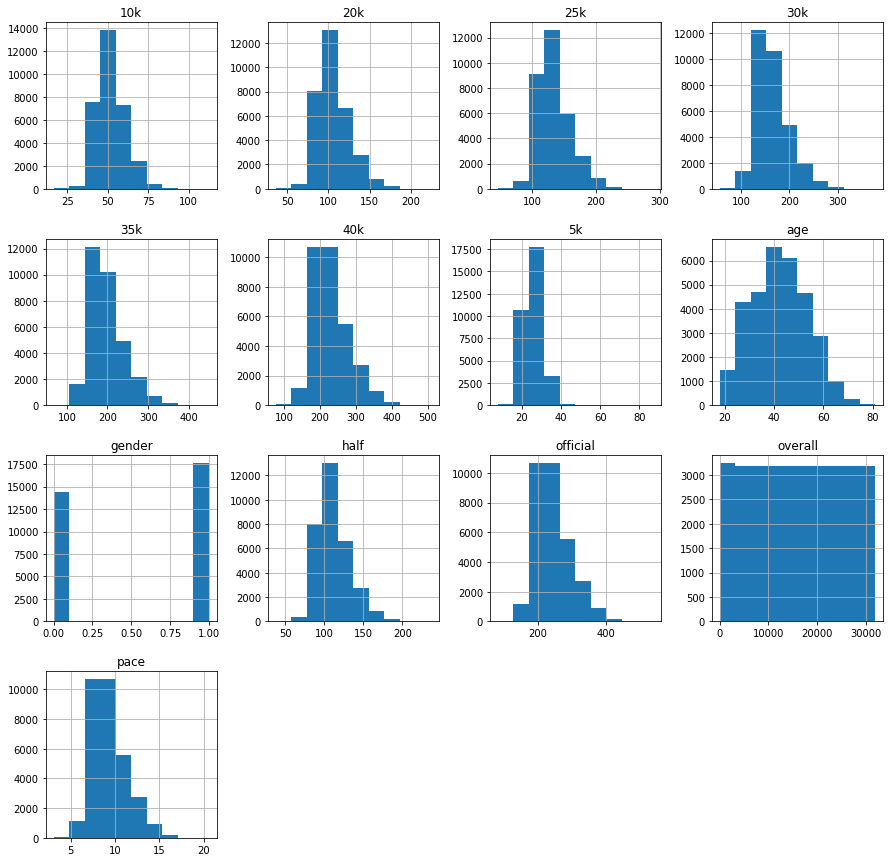

In [81]:

df.hist(figsize=(15, 15))

plt.show()

In [83]:
# the overall column appears to be the ranking of the individual overall. Will also drop

In [84]:
df = df.drop('overall', axis=1)

In [85]:
dummies = pd.get_dummies(df, columns=['country'])

In [86]:
dummies.head()

,10k,25k,gender,age,official,35k,pace,30k,5k,half,...,country_TPE,country_TRI,country_TUR,country_UAE,country_UKR,country_URU,country_USA,country_VEN,country_VGB,country_ZIM
0,17.37,47.67,1,47,85.25,71.40,3.27,59.18,8.02,39.72,...,0,0,0,0,0,0,0,0,0,0
1,32.58,82.43,0,33,138.95,116.37,5.30,99.33,16.22,69.47,...,0,0,0,0,0,0,0,0,0,0
2,16.62,45.80,1,41,80.60,67.42,3.08,56.45,7.75,38.03,...,0,0,0,0,0,0,0,0,0,0
3,32.57,82.43,0,24,140.58,116.37,5.37,99.33,16.20,69.47,...,0,0,0,0,0,0,0,0,0,0
4,17.12,46.37,1,40,81.23,67.83,3.10,57.03,8.02,38.60,...,0,0,0,0,0,0,0,0,0,0


In [87]:
dummies = dummies.dropna()

In [88]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31649 entries, 0 to 31983
Data columns (total 90 columns):
10k            31649 non-null float64
25k            31649 non-null float64
gender         31649 non-null int64
age            31649 non-null int64
official       31649 non-null float64
35k            31649 non-null float64
pace           31649 non-null float64
30k            31649 non-null float64
5k             31649 non-null float64
half           31649 non-null float64
20k            31649 non-null float64
40k            31649 non-null float64
country_ARG    31649 non-null uint8
country_AUS    31649 non-null uint8
country_AUT    31649 non-null uint8
country_BAH    31649 non-null uint8
country_BAR    31649 non-null uint8
country_BEL    31649 non-null uint8
country_BER    31649 non-null uint8
country_BLR    31649 non-null uint8
country_BOL    31649 non-null uint8
country_BRA    31649 non-null uint8
country_BRN    31649 non-null uint8
country_CAN    31649 non-null uint8
country